<h1>1. Naive Bayes </h1>

## 1.1 Loading Data

In [134]:
#import libraries
import pandas
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import Normalizer
from scipy.sparse import hstack
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score
from tqdm import tqdm
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [135]:
data = pandas.read_csv('preprocessed_data.csv',nrows=75000)
print(data['project_is_approved'].value_counts())

1    63421
0    11579
Name: project_is_approved, dtype: int64


<h2>1.2 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [136]:
y = data['project_is_approved'].values
X = data.drop(['project_is_approved'], axis=1)

In [137]:
#test-train split--for loops
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,stratify=y)
X_train,X_cv,y_train,y_cv=train_test_split(X_train,y_train,test_size=0.33,stratify=y_train)

<h2>1.3 Make Data Model Ready: encoding essay</h2>

In [139]:
# here
feature_names_list=[]
#Before vectorization- train,cv,test set sizes
print("Before Vectorization")
print(X_train.shape,y_train.shape)
print(X_cv.shape,y_cv.shape)
print(X_test.shape,y_test.shape)

bow_vectorizer = CountVectorizer(min_df=10,ngram_range=(1,4), max_features=5000)
tfidf_vectorizer = TfidfVectorizer(min_df=10,ngram_range=(1,4), max_features=5000)

#BOW Vectorization
X_train_essay_bow = bow_vectorizer.fit_transform(X_train['essay'].values)
X_cv_essay_bow = bow_vectorizer.transform(X_cv['essay'].values)
X_test_essay_bow = bow_vectorizer.transform(X_test['essay'].values)

#TFIDF Vectorization
X_train_essay_tfidf = tfidf_vectorizer.fit_transform(X_train['essay'].values)
X_cv_essay_tfidf = tfidf_vectorizer.transform(X_cv['essay'].values)
X_test_essay_tfidf = tfidf_vectorizer.transform(X_test['essay'].values)

feature_names_list.extend(bow_vectorizer.get_feature_names())
#After vectorization- train,cv,test set sizes
print("After Vectorization")
print(X_train_essay_bow.shape,y_train.shape)
print(X_cv_essay_bow.shape,y_cv.shape)
print(X_test_essay_bow.shape,y_test.shape)

print(X_train_essay_tfidf.shape,y_train.shape)
print(X_cv_essay_tfidf.shape,y_cv.shape)
print(X_test_essay_tfidf.shape,y_test.shape)

Before Vectorization
(33667, 8) (33667,)
(16583, 8) (16583,)
(24750, 8) (24750,)
After Vectorization
(33667, 5000) (33667,)
(16583, 5000) (16583,)
(24750, 5000) (24750,)
(33667, 5000) (33667,)
(16583, 5000) (16583,)
(24750, 5000) (24750,)


<h2>1.4 Make Data Model Ready: encoding numerical, categorical features</h2>

<h3>1.4.1 encoding categorical features: teacher_prefix,project_grade_category,school_state,clean_categories,clean_subcategories</h3>

In [140]:

#+++++++++++++++ teacher_prefix ++++++++++++++++++

bow_vectorizer = CountVectorizer()
tfidf_vectorizer = TfidfVectorizer()

#BOW
X_train_teacher_prefix_bow = bow_vectorizer.fit_transform(X_train['teacher_prefix'].values)
X_cv_teacher_prefix_bow = bow_vectorizer.transform(X_cv['teacher_prefix'].values)
X_test_teacher_prefix_bow = bow_vectorizer.transform(X_test['teacher_prefix'].values)

feature_names_list.extend(bow_vectorizer.get_feature_names())

#TFIDF
X_train_teacher_prefix_tfidf = tfidf_vectorizer.fit_transform(X_train['teacher_prefix'].values)
X_cv_teacher_prefix_tfidf = tfidf_vectorizer.transform(X_cv['teacher_prefix'].values)
X_test_teacher_prefix_tfidf = tfidf_vectorizer.transform(X_test['teacher_prefix'].values)

#+++++++++++++++ project_grade_category ++++++++++++++++++

bow_vectorizer = CountVectorizer()
tfidf_vectorizer = TfidfVectorizer()

#BOW
X_train_grade_category_bow = bow_vectorizer.fit_transform(X_train['project_grade_category'].values)
X_cv_grade_category_bow = bow_vectorizer.transform(X_cv['project_grade_category'].values)
X_test_grade_category_bow = bow_vectorizer.transform(X_test['project_grade_category'].values)

feature_names_list.extend(bow_vectorizer.get_feature_names())

#TFIDF
X_train_grade_category_tfidf = tfidf_vectorizer.fit_transform(X_train['project_grade_category'].values)
X_cv_grade_category_tfidf = tfidf_vectorizer.transform(X_cv['project_grade_category'].values)
X_test_grade_category_tfidf = tfidf_vectorizer.transform(X_test['project_grade_category'].values)

#+++++++++++++++ school_state ++++++++++++++++++

bow_vectorizer = CountVectorizer()
tfidf_vectorizer = TfidfVectorizer()

#BOW
X_train_school_state_bow = bow_vectorizer.fit_transform(X_train['school_state'].values)
X_cv_school_state_bow = bow_vectorizer.transform(X_cv['school_state'].values)
X_test_school_state_bow = bow_vectorizer.transform(X_test['school_state'].values)

feature_names_list.extend(bow_vectorizer.get_feature_names())

#TFIDF
X_train_school_state_tfidf = tfidf_vectorizer.fit_transform(X_train['school_state'].values)
X_cv_school_state_tfidf = tfidf_vectorizer.transform(X_cv['school_state'].values)
X_test_school_state_tfidf = tfidf_vectorizer.transform(X_test['school_state'].values)

#+++++++++++++++ clean_categories ++++++++++++++++++

bow_vectorizer = CountVectorizer()
tfidf_vectorizer = TfidfVectorizer()

#BOW
X_train_clean_categ_bow = bow_vectorizer.fit_transform(X_train['clean_categories'].values)
X_cv_clean_categ_bow = bow_vectorizer.transform(X_cv['clean_categories'].values)
X_test_clean_categ_bow = bow_vectorizer.transform(X_test['clean_categories'].values)

feature_names_list.extend(bow_vectorizer.get_feature_names())

#TFIDF
X_train_clean_categ_tfidf = tfidf_vectorizer.fit_transform(X_train['clean_categories'].values)
X_cv_clean_categ_tfidf = tfidf_vectorizer.transform(X_cv['clean_categories'].values)
X_test_clean_categ_tfidf = tfidf_vectorizer.transform(X_test['clean_categories'].values)

#+++++++++++++++ clean_subcategories ++++++++++++++++++

bow_vectorizer = CountVectorizer()
tfidf_vectorizer = TfidfVectorizer()

#BOW
X_train_clean_subcateg_bow = bow_vectorizer.fit_transform(X_train['clean_subcategories'].values)
X_cv_clean_subcateg_bow = bow_vectorizer.transform(X_cv['clean_subcategories'].values)
X_test_clean_subcateg_bow = bow_vectorizer.transform(X_test['clean_subcategories'].values)

feature_names_list.extend(bow_vectorizer.get_feature_names())

#TFIDF
X_train_clean_subcateg_tfidf = tfidf_vectorizer.fit_transform(X_train['clean_subcategories'].values)
X_cv_clean_subcateg_tfidf = tfidf_vectorizer.transform(X_cv['clean_subcategories'].values)
X_test_clean_subcateg_tfidf = tfidf_vectorizer.transform(X_test['clean_subcategories'].values)


<h3>1.4.2 encoding numerical features: price, teacher_number_of_previously_posted_projects</h3>

In [141]:
#++++++++++++++++++ price ++++++++++++++++++++++

normalizer = Normalizer()

X_train_price_norm = normalizer.fit_transform(X_train['price'].values.reshape(1,-1)).reshape(-1,1)
X_cv_price_norm = normalizer.transform(X_cv['price'].values.reshape(1,-1)).reshape(-1,1)
X_test_price_norm = normalizer.transform(X_test['price'].values.reshape(1,-1)).reshape(-1,1)

feature_names_list.append('Price')

#++++++++++++++++++ teacher_number_of_previously_posted_projects ++++++++++++++++++++++

normalizer = Normalizer()

X_train_num_prev_proj_norm = normalizer.fit_transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1)).reshape(-1,1)
X_cv_num_prev_proj_norm = normalizer.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(1,-1)).reshape(-1,1)
X_test_num_prev_proj_norm = normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(1,-1)).reshape(-1,1)

feature_names_list.append('teacher_number_of_previously_posted_projects')

<h3>1.4.3 Concatenating all the features</h3>

In [142]:
#SET-1 - essay(BOW)+categorical(BOW)+numerical

X_tr_set1 = hstack((X_train_essay_bow, X_train_teacher_prefix_bow, X_train_grade_category_bow, X_train_school_state_bow, X_train_clean_categ_bow,X_train_clean_subcateg_bow,X_train_price_norm,X_train_num_prev_proj_norm)).tocsr()
X_cr_set1 = hstack((X_cv_essay_bow, X_cv_teacher_prefix_bow, X_cv_grade_category_bow, X_cv_school_state_bow, X_cv_clean_categ_bow,X_cv_clean_subcateg_bow,X_cv_price_norm,X_cv_num_prev_proj_norm)).tocsr()
X_te_set1 = hstack((X_test_essay_bow, X_test_teacher_prefix_bow, X_test_grade_category_bow, X_test_school_state_bow, X_test_clean_categ_bow,X_test_clean_subcateg_bow,X_test_price_norm,X_test_num_prev_proj_norm)).tocsr()

#SET-1 - essay(TFIDF)+categorical(TFIDF)+numerical

X_tr_set2 = hstack((X_train_essay_tfidf, X_train_teacher_prefix_tfidf, X_train_grade_category_tfidf, X_train_school_state_tfidf, X_train_clean_categ_tfidf,X_train_clean_subcateg_tfidf,X_train_price_norm,X_train_num_prev_proj_norm)).tocsr()
X_cr_set2 = hstack((X_cv_essay_tfidf, X_cv_teacher_prefix_tfidf, X_cv_grade_category_tfidf, X_cv_school_state_tfidf, X_cv_clean_categ_tfidf,X_cv_clean_subcateg_tfidf,X_cv_price_norm,X_cv_num_prev_proj_norm)).tocsr()
X_te_set2 = hstack((X_test_essay_tfidf, X_test_teacher_prefix_tfidf, X_test_grade_category_tfidf, X_test_school_state_tfidf, X_test_clean_categ_tfidf,X_test_clean_subcateg_tfidf,X_test_price_norm,X_test_num_prev_proj_norm)).tocsr()

print("Final Data matrix")
print(X_tr_set1.shape, y_train.shape)
print(X_cr_set1.shape, y_cv.shape)
print(X_te_set1.shape, y_test.shape)
print("="*100)

Final Data matrix
(33667, 5101) (33667,)
(16583, 5101) (16583,)
(24750, 5101) (24750,)


<h2>1.5 Appling NB on different kind of featurization as mentioned in the instructions</h2>

<br>Apply NB on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

<h3>1.5.1 Appling MultinomialNB: BOW featurization(Set-1)</h3>

<h4>1.5.1.1 Hyper-parameter Tuning - To find right alpha(smoothing parameter)</h4>

In [143]:
def batch_predict(clf,data):
    #processing batch wise with each batch of size 1000 samples
    rem=data.shape[0]%1000
    total_batch_size=data.shape[0]-rem
    y_pred_prob=[]
    for j in range(0,total_batch_size,1000):
        y_pred_prob.extend(clf.predict_proba(data[j:j+1000])[:,1])
    if rem!=0:
        y_pred_prob.extend(clf.predict_proba(data[total_batch_size:])[:,1])
    return y_pred_prob

100%|██████████████████████████████████████████| 18/18 [00:06<00:00,  2.67it/s]


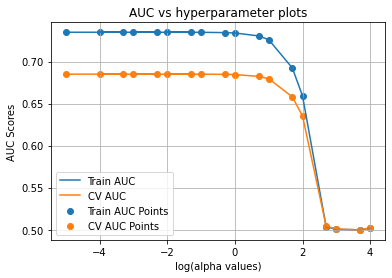

In [144]:
#simple for loop
alpha_values=[0.00001,0.0005, 0.0001,0.005,0.001,0.05,0.01,0.1,0.5,1,5,10,50,100,500,1000,5000,10000]
#alpha_values=range(0,100,5)
train_auc_set1=[]
cv_auc_set1=[]
train_acc_set1=[]
cv_acc_set1=[]
for i in tqdm(alpha_values):
    naive_bayes_clf=MultinomialNB(alpha=i,fit_prior=True)
    naive_bayes_clf.fit(X_tr_set1,y_train)
    
    #predicting the probabilities for positive class using batch_predict function, so as to calculate AUC scores
    y_train_set1_pred_prob = batch_predict(naive_bayes_clf,X_tr_set1)
    y_cv_set1_pred_prob = batch_predict(naive_bayes_clf,X_cr_set1)
    
    #Calculate AUC scores using predicted probabilities(of positive class) and actual values
    train_auc_set1.append(roc_auc_score(y_train,y_train_set1_pred_prob))
    cv_auc_set1.append(roc_auc_score(y_cv,y_cv_set1_pred_prob))
    
#plot the values of hyperparameter(alpha) vs AUC scores to get best_alpha
plt.plot(np.log10(alpha_values),train_auc_set1,label="Train AUC")
plt.plot(np.log10(alpha_values),cv_auc_set1,label="CV AUC")

plt.scatter(np.log10(alpha_values),train_auc_set1,label="Train AUC Points")
plt.scatter(np.log10(alpha_values),cv_auc_set1,label="CV AUC Points")

plt.legend()
plt.xlabel('log(alpha values)')
plt.ylabel('AUC Scores')
plt.title('AUC vs hyperparameter plots')
plt.grid()
plt.show()

<h3>1.5.2 Appling MultinomialNB: TFIDF featurization(Set-2)</h3>

<h4>1.5.2.1 Hyper-parameter Tuning - To find right alpha(smoothing parameter)</h4>

100%|██████████████████████████████████████████| 18/18 [00:04<00:00,  3.62it/s]


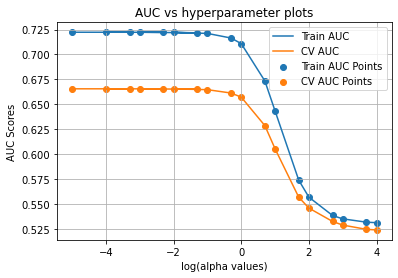

In [145]:
#simple for loop
alpha_values=[0.00001,0.0005, 0.0001,0.005,0.001,0.05,0.01,0.1,0.5,1,5,10,50,100,500,1000,5000,10000]
#alpha_values=range(0,100,5)
train_auc_set2=[]
cv_auc_set2=[]
train_acc_set2=[]
cv_acc_set2=[]
for i in tqdm(alpha_values):
    naive_bayes_clf=MultinomialNB(alpha=i,fit_prior=True)#TODO:play with fit_prior=False and different class priors=[0.5,0.5]
    naive_bayes_clf.fit(X_tr_set2,y_train)
    
    #predicting the probabilities for positive class using batch_predict function, so as to calculate AUC scores
    y_train_set2_pred_prob = batch_predict(naive_bayes_clf,X_tr_set2)
    y_cv_set2_pred_prob = batch_predict(naive_bayes_clf,X_cr_set2)
    
    #Calculate AUC scores using predicted probabilities(of positive class) and actual values
    train_auc_set2.append(roc_auc_score(y_train,y_train_set2_pred_prob))
    cv_auc_set2.append(roc_auc_score(y_cv,y_cv_set2_pred_prob))
    
#plot the values of hyperparameter(alpha) vs AUC scores to get best_alpha
plt.plot(np.log10(alpha_values),train_auc_set2,label="Train AUC")
plt.plot(np.log10(alpha_values),cv_auc_set2,label="CV AUC")

plt.scatter(np.log10(alpha_values),train_auc_set2,label="Train AUC Points")
plt.scatter(np.log10(alpha_values),cv_auc_set2,label="CV AUC Points")

plt.legend()
plt.xlabel('log(alpha values)')
plt.ylabel('AUC Scores')
plt.title('AUC vs hyperparameter plots')
plt.grid()
plt.show()

<h2>1.6 Test Performance of model on Test Data</h2>
<h3>1.6.1 Plot ROC plots and estimate AUC for Test Data</h3>

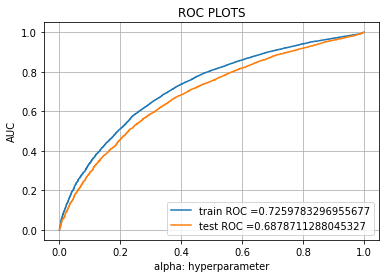

Negative class Top 20 feature names from Set-1:
['students' 'school' 'learning' 'my' 'classroom' 'not' 'learn' 'they'
 'help' 'the' 'my students' 'nannan' 'many' 'we' 'need' 'work' 'reading'
 'come' 'skills' 'love']
Positive class Top 20 feature names from Set-1:
['students' 'school' 'my' 'learning' 'classroom' 'the' 'not' 'they'
 'learn' 'my students' 'help' 'many' 'nannan' 'we' 'work' 'reading' 'need'
 'use' 'love' 'day']


In [146]:
# here
best_alpha=10 # for Bow featurization
naive_bayes_clf = MultinomialNB(alpha=best_alpha,fit_prior=True)
naive_bayes_clf.fit(X_tr_set1, y_train)

y_train_set1_pred_prob = batch_predict(naive_bayes_clf, X_tr_set1)    
y_test_set1_pred_prob = batch_predict(naive_bayes_clf, X_te_set1)
y_test_set1_pred=naive_bayes_clf.predict(X_te_set1)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_set1_pred_prob)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_set1_pred_prob)

plt.plot(train_fpr, train_tpr, label="train ROC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test ROC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("ROC PLOTS")
plt.grid()
plt.show()

#finding top20 features from set-1
features=naive_bayes_clf.feature_log_prob_
features_top_20_neg_set1=np.array(feature_names_list)[np.argsort(features[0])[:-21:-1]]
features_top_20_pos_set1=np.array(feature_names_list)[np.argsort(features[1])[:-21:-1]]
print("Negative class Top 20 feature names from Set-1:")
print(features_top_20_neg_set1[:])
print("Positive class Top 20 feature names from Set-1:")
print(features_top_20_pos_set1[:])

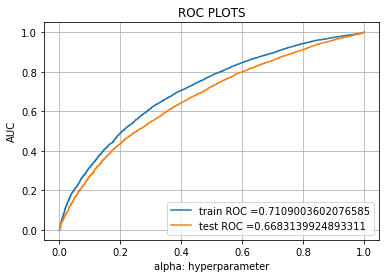

Negative class Top 20 feature names from Set-2:
['mrs' 'grades_prek_2' 'ms' 'literacy_language' 'grades_3_5'
 'math_science' 'literacy' 'mathematics' 'grades_6_8' 'ca' 'health_sports'
 'literature_writing' 'students' 'specialneeds' 'appliedlearning'
 'specialneeds' 'grades_9_12' 'mr' 'tx' 'appliedsciences']
Positive class Top 20 feature names from Set-2:
['mrs' 'grades_prek_2' 'literacy_language' 'ms' 'grades_3_5'
 'math_science' 'literacy' 'mathematics' 'literature_writing' 'grades_6_8'
 'ca' 'health_sports' 'students' 'specialneeds' 'grades_9_12' 'mr'
 'specialneeds' 'health_wellness' 'appliedlearning' 'music_arts']


In [147]:
# here
best_alpha=1 # for TFIDF featurization
naive_bayes_clf = MultinomialNB(alpha=best_alpha,fit_prior=True)
naive_bayes_clf.fit(X_tr_set2, y_train)

y_train_set2_pred_prob = batch_predict(naive_bayes_clf, X_tr_set2)    
y_test_set2_pred_prob = batch_predict(naive_bayes_clf, X_te_set2)
y_test_set2_pred=naive_bayes_clf.predict(X_te_set2) # To compute confusion Matrix

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_set2_pred_prob)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_set2_pred_prob)

plt.plot(train_fpr, train_tpr, label="train ROC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test ROC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("ROC PLOTS")
plt.grid()
plt.show()

#finding top20 features from set-1
features=naive_bayes_clf.feature_log_prob_
features_top_20_neg_set2=np.array(feature_names_list)[np.argsort(features[0])[:-21:-1]]
features_top_20_pos_set2=np.array(feature_names_list)[np.argsort(features[1])[:-21:-1]]
print("Negative class Top 20 feature names from Set-2:")
print(features_top_20_neg_set2[:])
print("Positive class Top 20 feature names from Set-2:")
print(features_top_20_pos_set2[:])

<h3>1.6.2 Plot Confusion Matrix</h3>

0.8226614914016914


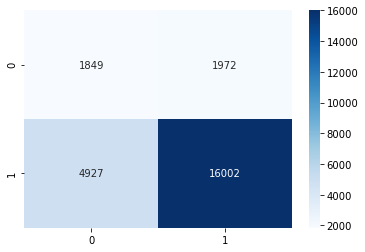

In [148]:
cm=confusion_matrix(y_test,y_test_set1_pred)
sns.heatmap(cm, annot=True,fmt="d",cmap='Blues')
precision=cm[1][1]/(cm[1][1]+cm[1][0])
recall=cm[1][1]/(cm[1][1]+cm[0][1])
F1_score_set1 =(2*precision*recall)/(precision+recall)
print(F1_score_set1)

0.9136236726976938


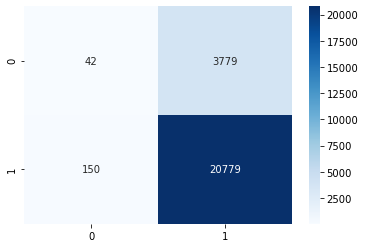

In [149]:
cm=confusion_matrix(y_test,y_test_set2_pred)
sns.heatmap(cm, annot=True,fmt="d",cmap='Blues')
precision=cm[1][1]/(cm[1][1]+cm[1][0])
recall=cm[1][1]/(cm[1][1]+cm[0][1])
F1_score_set2 =(2*precision*recall)/(precision+recall)
print(F1_score_set2)

<h1>3. Summary</h1>


In [ ]:
############################################################################################

#+----------------+---------------+-------------------------+-----------------+-------------+
#|   Vectorizer   |     Model     |  Hyperparameter(alpha)  |  AUC(TEST SET)  |  F1-Score   |
#+----------------+---------------+-------------------------+-----------------+-------------+
#|    BOW         | MultinomialNB |          10             |    0.68787      |  0.82266    |
#+----------------+---------------+-------------------------+-----------------+-------------+
#|    TFIDF       | MultinomialNB |           1             |    0.66831      |  0.91362    |
#+----------------+---------------+-------------------------+-----------------+-------------+

############################################################################################